In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/train_ctrUa4K.csv')
test = pd.read_csv('https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/test_lAUu6dG.csv')
sub =pd.read_csv('https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/sample_submission_49d68Cx.csv')

In [ ]:
train_ori = train.copy()
test_ori = test.copy()

In [ ]:
train.shape

(614, 13)

In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


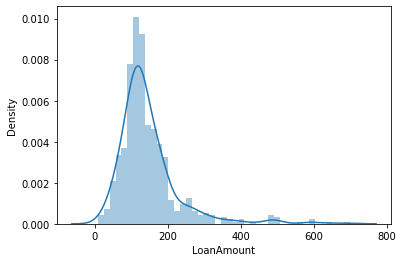

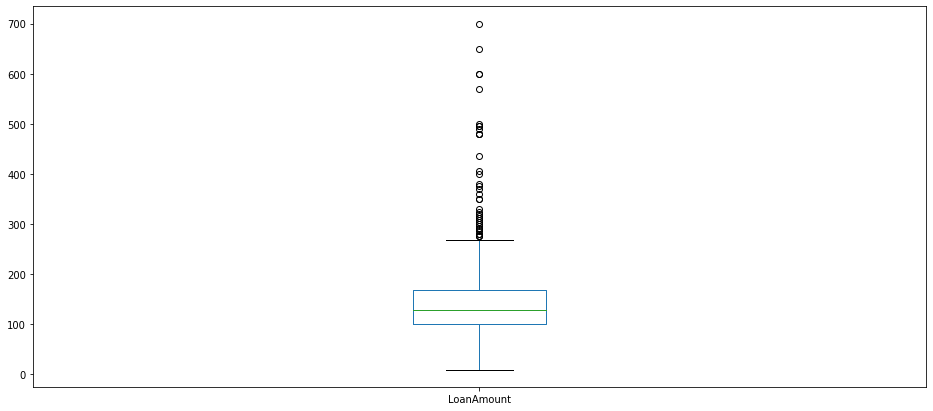

In [ ]:
sns.distplot(train.LoanAmount)
plt.show()
train.LoanAmount.plot.box(figsize = (16,7))
plt.show()

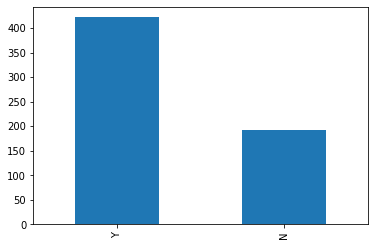

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

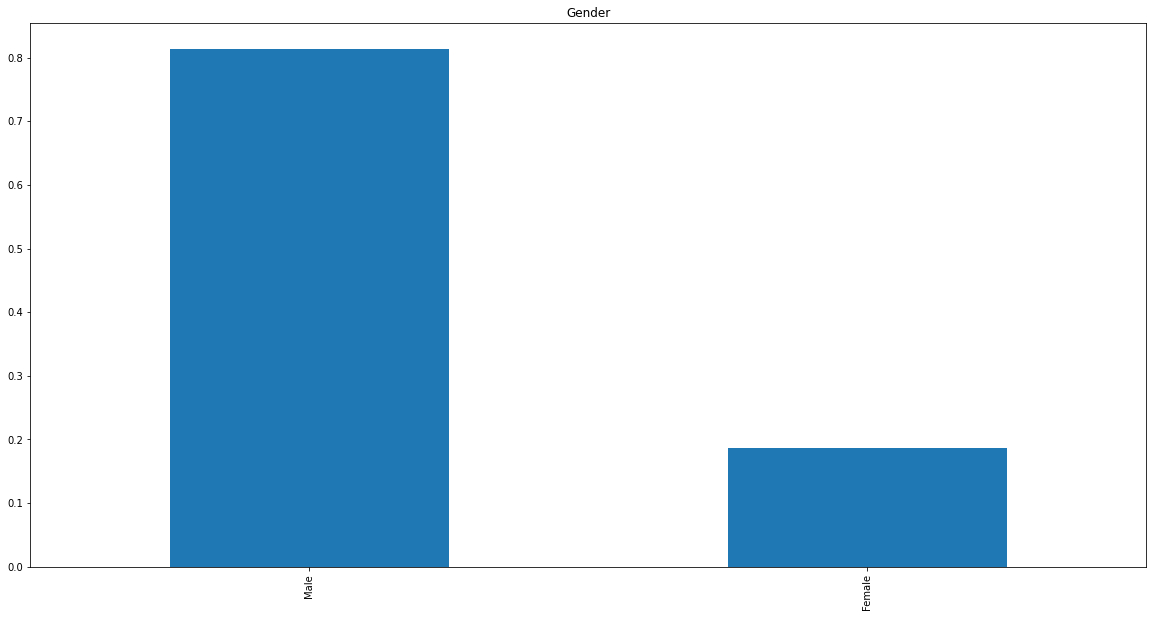

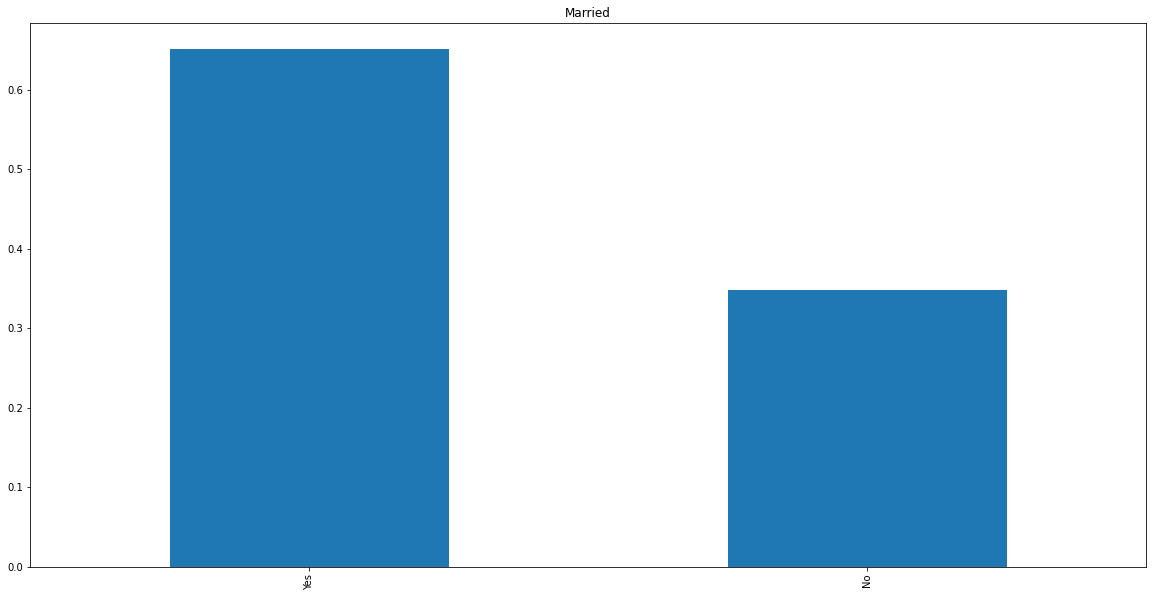

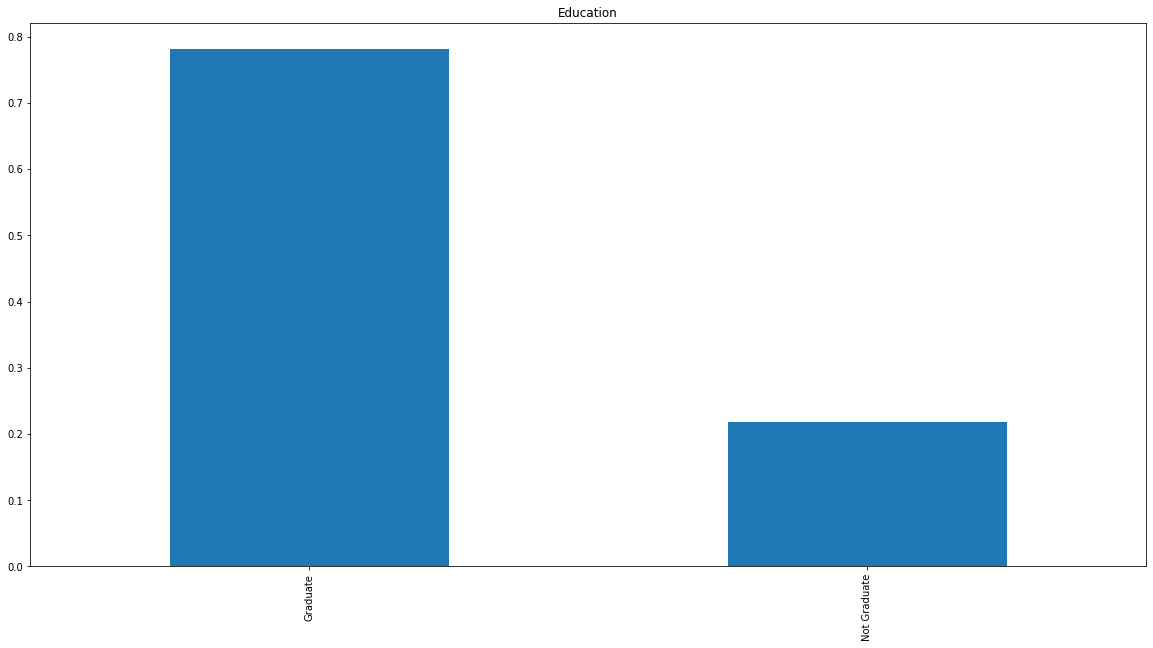

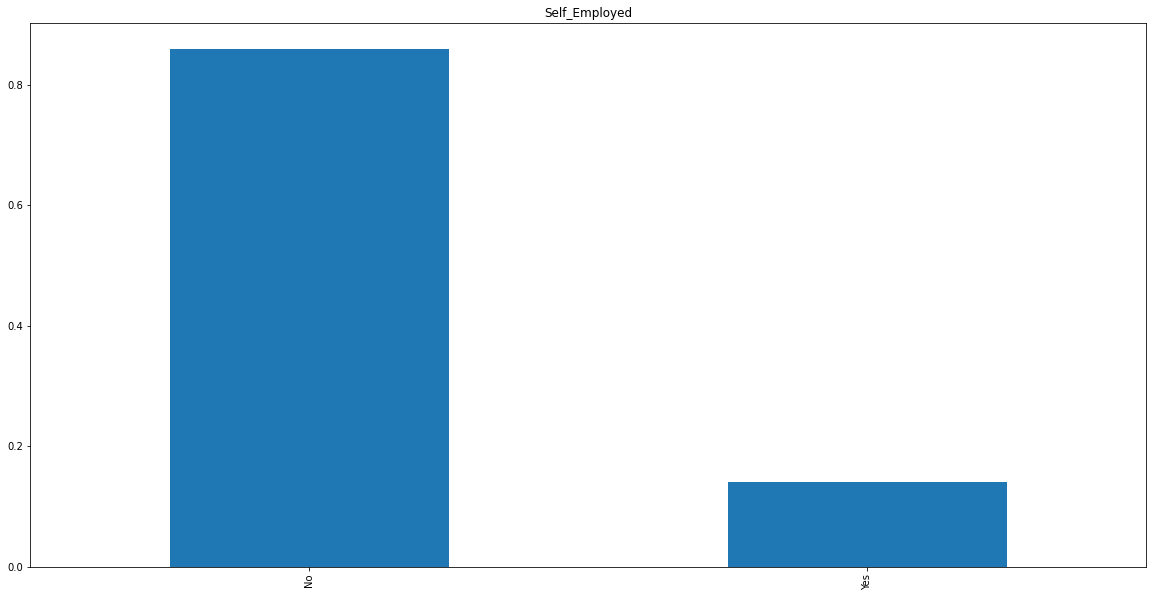

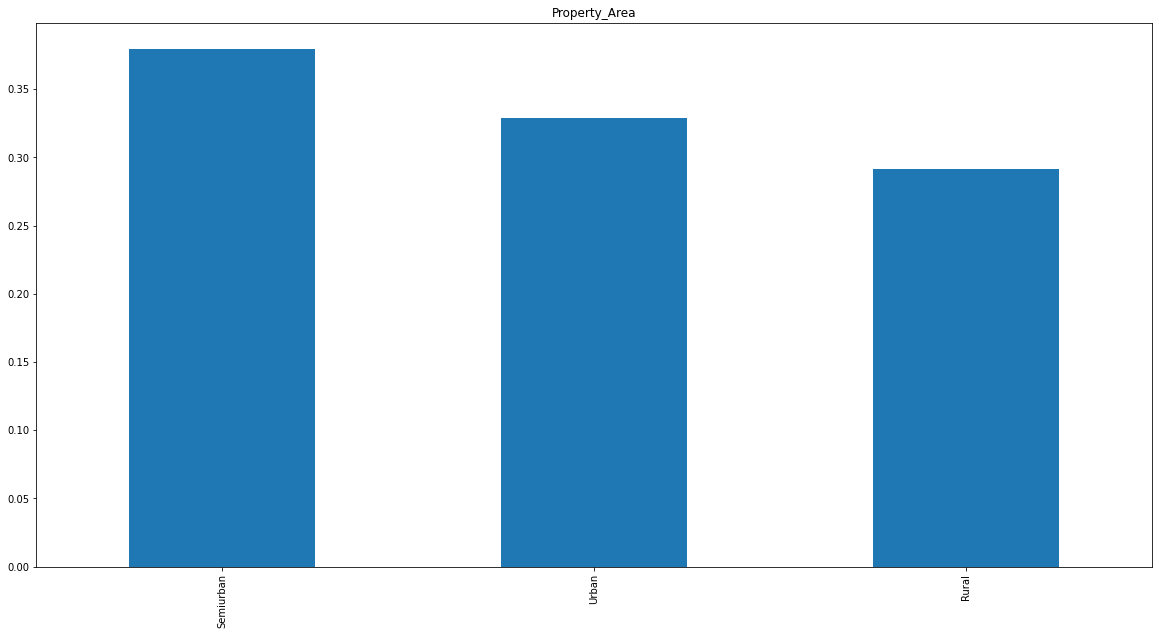

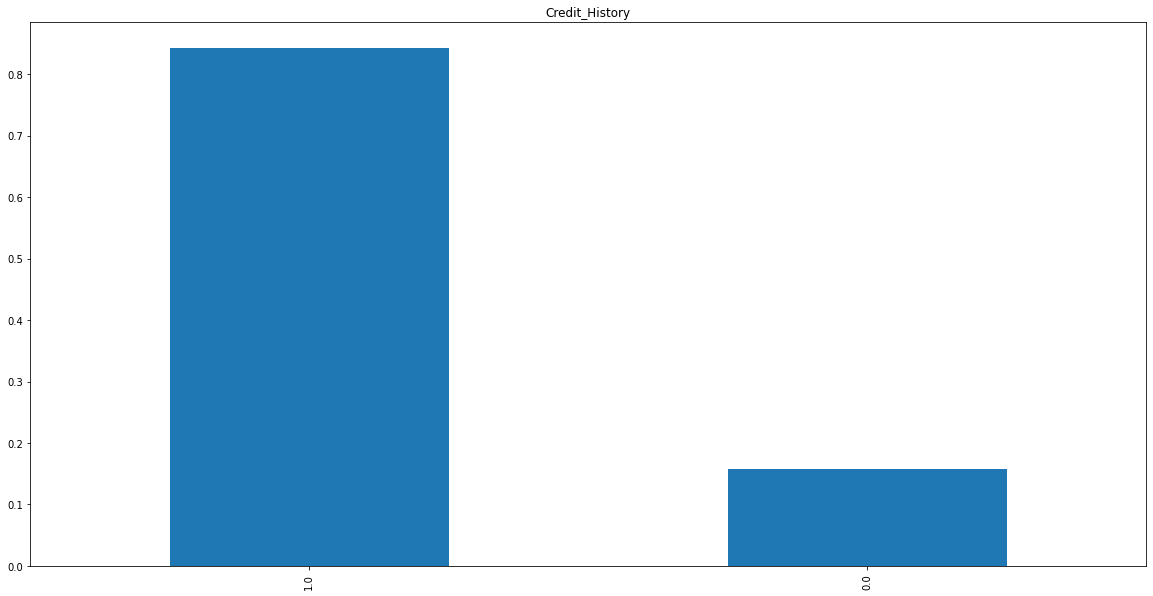

In [ ]:
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "Gender")
plt.show()
train['Married'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "Married")
plt.show()
train['Education'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "Education")
plt.show()
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "Self_Employed")
plt.show()
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "Property_Area")
plt.show()
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "Credit_History")
plt.show()

Numerical Values visualisation


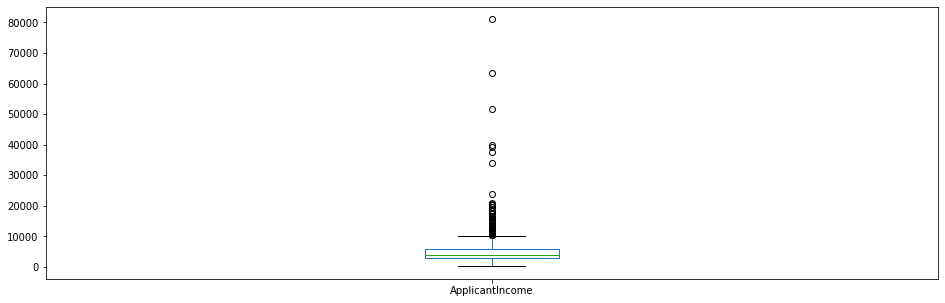

In [ ]:
train['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

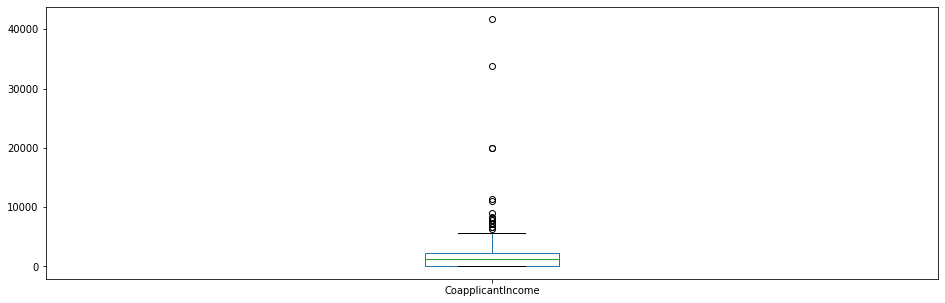

In [ ]:
train['CoapplicantIncome'].plot.box(figsize = (16,5))
plt.show()

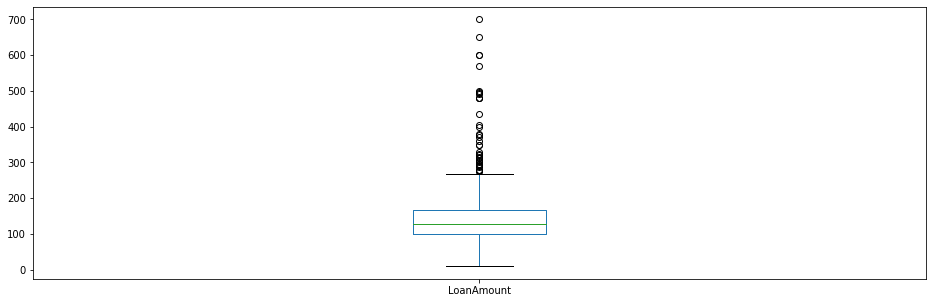

In [ ]:

train['LoanAmount'].plot.box(figsize = (16,5))
plt.show()

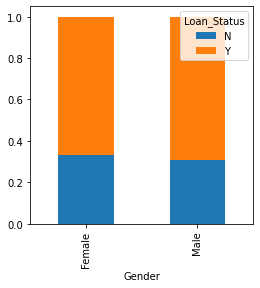

In [ ]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True ,figsize = (4,4))
plt.show()

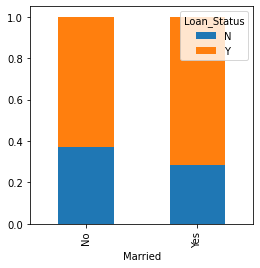

In [ ]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True ,figsize = (4,4))
plt.show()

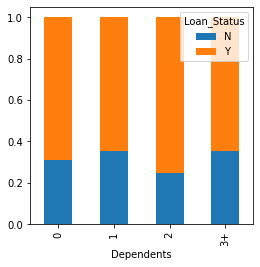

In [ ]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True ,figsize = (4,4))
plt.show()

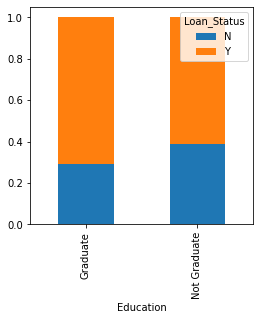

In [ ]:
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True ,figsize = (4,4))
plt.show()

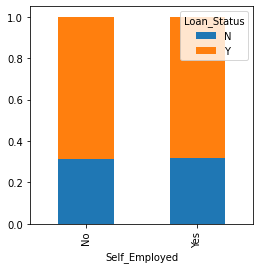

In [ ]:
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True ,figsize = (4,4))
plt.show()

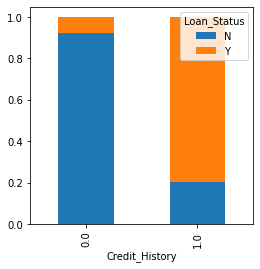

In [ ]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True ,figsize = (4,4))
plt.show()

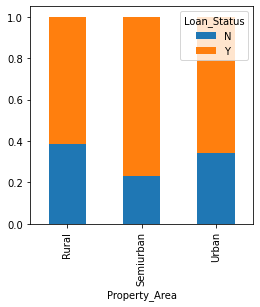

In [ ]:
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True ,figsize = (4,4))
plt.show()

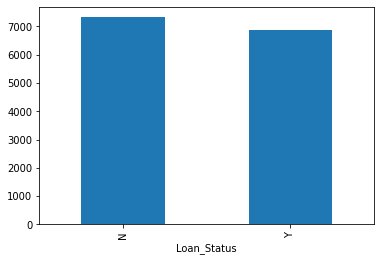

In [ ]:
train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train.groupby('Loan_Status')['total_income'].mean().plot.bar()

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
total_income         float64
dtype: object

In [ ]:
train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [ ]:
ir =   train.total_income.quantile(0.75) - train.total_income.quantile(0.25)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

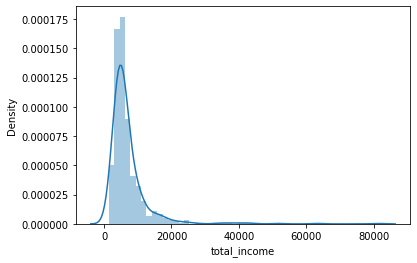

In [ ]:
sns.distplot(train.total_income)
plt.plot()

In [ ]:
lower = train.LoanAmount.quantile(0.25) - 1*5*ir
upper = train.LoanAmount.quantile(0.75) + 1*5*ir
print(lower,' ',upper)

-16678.75   16946.75


In [ ]:
train.loc[train.total_income > 24300,'total_income'] =24300 

In [ ]:
train.Gender.fillna(train.Gender.mode()[0],inplace = True)
train.Married.fillna(train.Married.mode()[0],inplace = True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace = True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace = True)
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace = True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace = True)
train.LoanAmount.fillna(train.LoanAmount.median(),inplace = True)

In [ ]:
test.Gender.fillna(test.Gender.mode()[0],inplace = True)
test.Married.fillna(test.Married.mode()[0],inplace = True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace = True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace = True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0],inplace = True)
test.Credit_History.fillna(test.Credit_History.mode()[0],inplace = True)
test.LoanAmount.fillna(test.LoanAmount.median(),inplace = True)

In [ ]:
len(train)

614

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


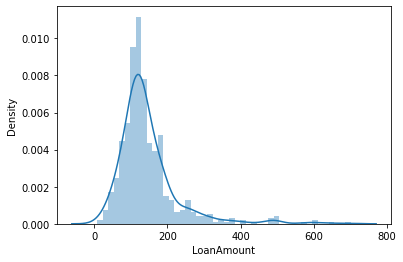

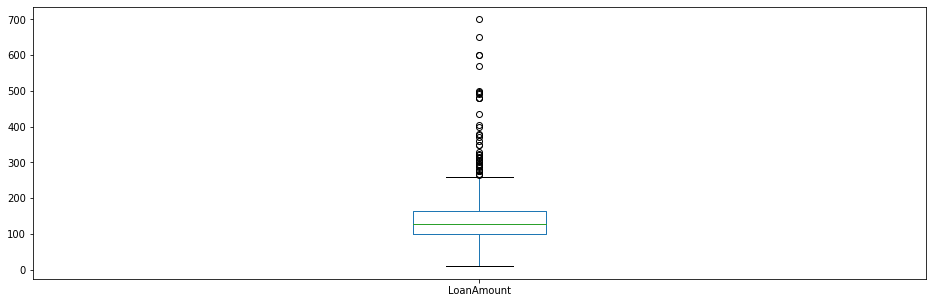

In [ ]:
sns.distplot(train.LoanAmount)
plt.show()
train['LoanAmount'].plot.box(figsize = (16,5))
plt.show()

In [ ]:
train.drop('Loan_ID',axis =1,inplace= True)

In [ ]:
train.drop(['ApplicantIncome','CoapplicantIncome'],axis =1 ,inplace = True)


In [ ]:
y = train.Loan_Status

In [ ]:
train = pd.get_dummies(train)

In [ ]:
c0 = []
c1 = []
for i in range(len(train)):
    if(train.Credit_History[i] == 1.0):
        c1.append(1)
    else:
        c1.append(0)
    if(train.Credit_History[i] == 0.0):
        c0.append(1)
    else:
        c0.append(0)
train['Credit_History_1'] = c1
train['Credit_History_0'] = c0

In [ ]:
train.drop('Credit_History',axis =1 ,inplace = True)

In [ ]:
train.drop(['Loan_Status_N','Loan_Status_Y'],axis = 1,inplace= True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


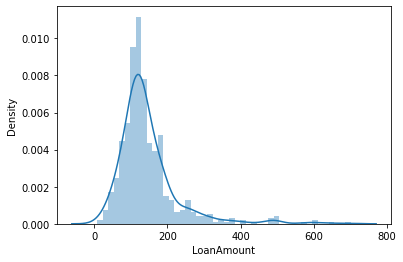

In [ ]:
sns.distplot(train.LoanAmount)

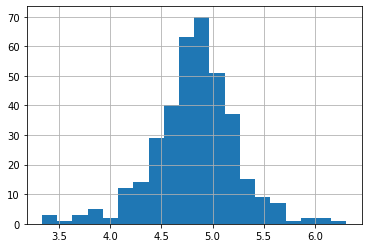

In [ ]:
train.LoanAmount=np.log(train.LoanAmount)
test.LoanAmount=np.log(test.LoanAmount)
test.LoanAmount.hist(bins=20)

In [ ]:
y1=[]
y 
for i in range(len(y)):
    if(y[i] =='N'):
        y1.append(0)
    else:
        y1.append(1)
y = y1

In [ ]:
test =test.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis =1)

In [ ]:
test.drop('Loan_ID',axis = 1,inplace = True)

In [ ]:
test=pd.get_dummies(test)
#y=pd.get_dummies(y)

In [ ]:
c0 = []
c1 = []
for i in range(len(test)):
    if(test.Credit_History[i] == 1.0):
        c1.append(1)
    else:
        c1.append(0)
    if(test.Credit_History[i] == 0.0):
        c0.append(1)
    else:
        c0.append(0)
test['Credit_History_1'] = c1
test['Credit_History_0'] = c0

In [ ]:
test.drop('Credit_History',axis = 1,inplace = True)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(train,y,test_size=0.3)
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Credit_History_1           0
Credit_History_0           0
dtype: int64

In [ ]:
model.fit(train,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(train,y)

0.8094462540716613

In [ ]:
test_pred = model.predict(test)

In [ ]:
tf = []
for i in range(len(test_pred)):
    if(test_pred[i] ==1):
        tf.append('Y')
    else:
        tf.append('N')


In [ ]:
sub['Loan_Status'] = tf

In [ ]:
sub

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
sub.to_csv('Loan_predictor_submission.csv')